# **Implementación Gradient Descent sin el uso de un framework**

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

## **Conociendo el dataset**

In [2]:
# Cargar dataset
data = pd.read_csv("Student_Performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


### **Cambio de tipo de variables**

In [3]:
data['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [4]:
# Transformar variables categóricas a numéricas con mapeo
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'No': 0, 'Yes': 1})
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [5]:
# Valores unicos de la columna objetivo
unique_values = np.unique(data['Performance Index'])
unique_values


array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100.])

### **Cambio de la variable objetivo**

In [6]:
# Transformar variable objetivo en categórica failed y passed
data['Performance Index'] = ['Passed' if x > 70 else 'Failed' for x in data['Performance Index']]
# Transformar variable objetivo a binario
data['Performance Index'] = [1 if x == 'Passed' else 0 for x in data['Performance Index']]
# Convertir predicciones a enteros
data['Performance Index'] = data['Performance Index'].astype(int)
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,1
1,4,82,0,4,2,0
2,8,51,1,7,2,0
3,5,52,1,5,2,0
4,7,75,0,8,5,0
...,...,...,...,...,...,...
9995,1,49,1,4,2,0
9996,7,64,1,8,5,0
9997,6,83,1,8,5,1
9998,9,97,1,7,0,1


### **Llenado de valores faltantes**

In [8]:
# Fill NaNs con la media de la columna
data.fillna(data['Extracurricular Activities'].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


### **Balance de clases**

In [9]:
# Revisar si las clases 0 y 1 están balanceadas
data['Performance Index'].value_counts()

Performance Index
0    7495
1    2505
Name: count, dtype: int64

#### **Submuestreo**

In [10]:
# Debido al desbalance del dataset, se opta por hacer un submuestreo de la clase mayoritaria
# Contar ejemplos por clase
counts = data['Performance Index'].value_counts()
minority_class = counts.idxmin()
majority_class = counts.idxmax()

# Separar clases
minority_df = data[data['Performance Index'] == minority_class]
majority_df = data[data['Performance Index'] == majority_class].sample(n=len(minority_df), random_state=42)

# Unir y mezclar
sub_balanced_data = pd.concat([minority_df, majority_df]).sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
# Revisar balanceo
sub_balanced_data['Performance Index'].value_counts()

Performance Index
1    2505
0    2505
Name: count, dtype: int64

#### **Sobremuestreo**

In [12]:
# Debido al desbalance de las clases, se balancea el dataset con un sobremuestreo de la clase minoritaria
# Contar ejemplos por clase
counts = data['Performance Index'].value_counts()
minority_class = counts.idxmin()
majority_class = counts.idxmax()

# Separar clases
minority_df = data[data['Performance Index'] == minority_class]
majority_df = data[data['Performance Index'] == majority_class]

# Sobremuestreo
minority_oversampled = minority_df.sample(n=len(majority_df), replace=True, random_state=42)

# Unir y mezclar
sobre_balanced_data = pd.concat([majority_df, minority_oversampled]).sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
# Revisar balanceo
sobre_balanced_data['Performance Index'].value_counts()

Performance Index
1    7495
0    7495
Name: count, dtype: int64

## **Functions**

### **Split Data**

In [14]:
def split(data):
    """
    Split the data into features and target randomly.
    Args:
        data: The input data.

    Returns:
        X_train, X_test, y_train, y_test
    """
    # Mezclar los índices aleatoriamente
    indices = np.random.permutation(len(data))
    train_size = int(0.8 * len(data))
    train_idx = indices[:train_size]
    test_idx = indices[train_size:]

    X = data.drop("Performance Index", axis=1)
    y = data["Performance Index"]

    X_train = X.iloc[train_idx].reset_index(drop=True)
    X_test = X.iloc[test_idx].reset_index(drop=True)
    y_train = y.iloc[train_idx].reset_index(drop=True)
    y_test = y.iloc[test_idx].reset_index(drop=True)

    return X_train, X_test, y_train, y_test

### **Evaluation**

In [15]:
def evaluate_model(X, w):
    """
    Train the model using gradient descent.
    X: Training features
    w: Initial weights
    """
    eval_xw = X * w
    predictions = np.sum(eval_xw, axis=1).round()

    for i in range(len(predictions)):
        if predictions.iloc[i] < 0:
            predictions.iloc[i] = 0
        elif predictions.iloc[i] > 100:
            predictions.iloc[i] = 100

    # Transformar predictions en categórica
    predictions = ['1' if x > 70 else '0' for x in predictions]
    predictions = pd.Series(predictions)
    predictions = predictions.astype(int)

    return predictions


### **Backpropagation: Gradient Descent**

In [ ]:
def gradient_descent(X, y, pred, w, w_change, alpha):
    """
    Perform gradient descent optimization.
    X: Training features
    y: Training target
    pred: Predictions
    w: Weights
    w_change: Change in weights
    alpha: Learning rate
    """
    for i in range(len(w)):
        # Calculo del error
        error = y - pred
        grad = np.dot(error, X[:, i])  # Producto punto entre error y columna i

        # Calcular nuevos cambios en los pesos
        w_change[i] = w_change[i] + alpha * grad

        # Actualizar el cambio de peso usando la columna i de X
        w[i] += w_change[i]

    return w, w_change


### **Model Performance**

In [17]:
def performance(y_true, y_pred):
    """
    Calculate and display performance metrics.
    y_true: True labels
    y_pred: Predicted labels
    """
    # Matriz de confusión y_true vs y_pred
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed'])

    # Reporte de clasificación
    print(classification_report(y_true, y_pred))


## **Model**

### **Dataset Original**

In [50]:
X_train, X_test, y_train, y_test = split(data)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


In [51]:
datos_train = pd.concat([X_train, y_train], axis=1)
datos_test = pd.concat([X_test, y_test], axis=1)
datos_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,6,92,0,4,9,1
1,3,47,1,7,6,0
2,7,91,0,5,1,1
3,1,93,0,6,2,0
4,4,98,1,7,2,1
...,...,...,...,...,...,...
7995,7,56,0,9,5,0
7996,6,89,1,8,8,1
7997,4,67,1,6,2,0
7998,2,79,1,5,3,0


In [52]:
datos_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,9,73,1,6,5,0
1,1,52,0,9,1,0
2,6,85,0,4,0,0
3,3,84,1,8,5,0
4,7,81,0,6,8,1
...,...,...,...,...,...,...
1995,5,56,1,8,2,0
1996,1,85,1,6,9,0
1997,1,93,1,8,0,0
1998,8,59,1,4,7,0


In [119]:
# Inicialización de pesos entre -0.5 y 0.5 
weights = [0.4, 0.8, 0.1, 0.6, 0.3]
# Inicialización de cambios de pesos en cero
w_change = np.zeros(len(weights))

epochs = 150
alpha = 0.001

print(weights)
print(w_change)

[0.4, 0.8, 0.1, 0.6, 0.3]
[0. 0. 0. 0. 0.]


In [120]:
for epoch in range(epochs):
    # Calcular predicciones
    predictions = evaluate_model(X_train, weights)

    # Actualizar pesos
    weights, w_change = gradient_descent(X_train.values, y_train.values, predictions.values, weights, w_change, alpha)

In [121]:
print("PESOS FINALES:", "\n w1 = ", weights[0], 
                        "\n w2 = ", weights[1], 
                        "\n w3 = ", weights[2], 
                        "\n w4 = ", weights[3], 
                        "\n w5 = ", weights[4])

PESOS FINALES: 
 w1 =  3086.6350000000007 
 w2 =  2236.728999999994 
 w3 =  -1931.276000000001 
 w4 =  -22037.817000000017 
 w5 =  -7342.772000000004


In [122]:
weights = np.array(weights, dtype=float)
print(weights)
# Evaluar modelo final en conjunto de prueba
test_predictions = evaluate_model(X_test, weights)

[  3086.635   2236.729  -1931.276 -22037.817  -7342.772]


              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1535
           1       0.42      0.77      0.54       465

    accuracy                           0.70      2000
   macro avg       0.66      0.72      0.66      2000
weighted avg       0.79      0.70      0.72      2000



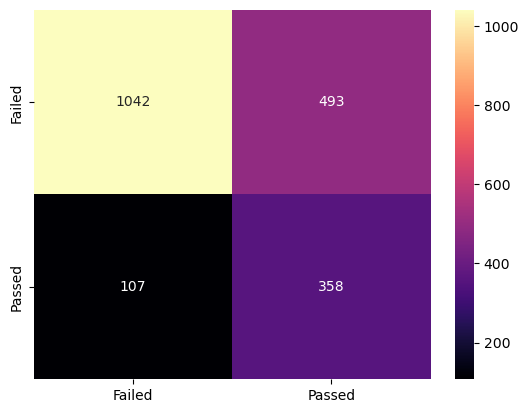

In [123]:
# Evaluar performance del modelo
performance(y_test, test_predictions)

### **Dataset submuestreo**

In [58]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = split(sub_balanced_data)
print(X_train_sub.shape, X_test_sub.shape, y_train_sub.shape, y_test_sub.shape)

(4008, 5) (1002, 5) (4008,) (1002,)


In [59]:
datos_train_sub = pd.concat([X_train_sub, y_train_sub], axis=1)
datos_test_sub = pd.concat([X_test_sub, y_test_sub], axis=1)
datos_train_sub

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,1,83,1,4,6,0
1,9,95,0,6,0,1
2,5,85,0,8,5,1
3,7,87,0,5,4,1
4,8,85,1,4,6,1
...,...,...,...,...,...,...
4003,9,75,0,7,4,1
4004,7,90,1,5,7,1
4005,8,83,0,9,3,1
4006,8,95,1,4,6,1


In [60]:
datos_test_sub

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,9,67,1,8,8,0
1,1,45,0,7,2,0
2,6,67,0,8,3,0
3,1,97,1,8,0,1
4,9,89,1,7,9,1
...,...,...,...,...,...,...
997,7,58,1,6,4,0
998,8,75,0,8,0,0
999,9,89,0,7,2,1
1000,9,96,0,7,4,1


In [94]:
# Inicialización de pesos entre -0.5 y 0.5 
weights = [0.4, 0.8, 0.1, 0.6, 0.3]
# Inicialización de cambios de pesos en cero
w_change = np.zeros(len(weights))

epochs = 300
alpha = 0.001

print(weights)
print(w_change)

[0.4, 0.8, 0.1, 0.6, 0.3]
[0. 0. 0. 0. 0.]


In [95]:
for epoch in range(epochs):
    # Calcular predicciones
    predictions = evaluate_model(X_train_sub, weights)

    # Actualizar pesos
    weights, w_change = gradient_descent(X_train_sub.values, y_train_sub.values, predictions.values, weights, w_change, alpha)

In [96]:
print("PESOS FINALES:", "\n w1 = ", weights[0], 
                        "\n w2 = ", weights[1], 
                        "\n w3 = ", weights[2], 
                        "\n w4 = ", weights[3], 
                        "\n w5 = ", weights[4])

PESOS FINALES: 
 w1 =  7331.856999999995 
 w2 =  1685.5680000000625 
 w3 =  -3625.3559999999984 
 w4 =  -23868.50800000003 
 w5 =  -938.8389999999946


In [97]:
weights = np.array(weights, dtype=float)
print(weights)
# Evaluar modelo final en conjunto de prueba
test_predictions = evaluate_model(X_test_sub, weights)


[  7331.857   1685.568  -3625.356 -23868.508   -938.839]


              precision    recall  f1-score   support

           0       0.70      0.64      0.67       487
           1       0.68      0.74      0.71       515

    accuracy                           0.69      1002
   macro avg       0.69      0.69      0.69      1002
weighted avg       0.69      0.69      0.69      1002



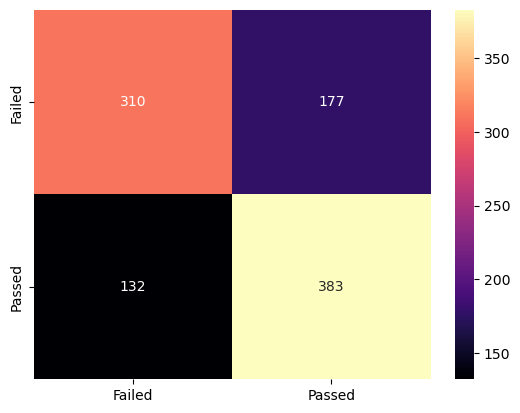

In [98]:
# Evaluar performance del modelo
performance(y_test_sub, test_predictions)

### **Dataset sobremuestreo**

In [66]:
X_train_sobre, X_test_sobre, y_train_sobre, y_test_sobre = split(sobre_balanced_data)
print(X_train_sobre.shape, X_test_sobre.shape, y_train_sobre.shape, y_test_sobre.shape)

(11992, 5) (2998, 5) (11992,) (2998,)


In [67]:
datos_train_sobre = pd.concat([X_train_sobre, y_train_sobre], axis=1)
datos_test_sobre = pd.concat([X_test_sobre, y_test_sobre], axis=1)
datos_train_sobre

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,86,1,8,2,1
1,3,59,1,8,5,0
2,4,93,1,8,8,1
3,4,70,0,5,4,0
4,9,67,0,4,9,0
...,...,...,...,...,...,...
11987,1,67,0,9,3,0
11988,6,99,1,8,5,1
11989,7,43,1,4,3,0
11990,2,58,1,9,8,0


In [68]:
datos_test_sobre

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,3,95,1,4,9,1
1,9,40,0,5,5,0
2,5,68,0,6,5,0
3,9,97,1,6,2,1
4,2,54,1,9,5,0
...,...,...,...,...,...,...
2993,4,57,0,4,3,0
2994,9,83,1,8,2,1
2995,5,53,0,5,8,0
2996,7,88,0,8,2,1


In [104]:
# Inicialización de pesos entre -0.5 y 0.5 
weights = [0.4, 0.8, 0.1, 0.6, 0.3]
# Inicialización de cambios de pesos en cero
w_change = np.zeros(len(weights))

epochs = 300
alpha = 0.001

print(weights)
print(w_change)

[0.4, 0.8, 0.1, 0.6, 0.3]
[0. 0. 0. 0. 0.]


In [105]:
for epoch in range(epochs):
    # Calcular predicciones
    predictions = evaluate_model(X_train_sobre, weights)

    # Actualizar pesos
    weights, w_change = gradient_descent(X_train_sobre.values, y_train_sobre.values, predictions.values, weights, w_change, alpha)


In [106]:
print("PESOS FINALES:", "\n w1 = ", weights[0], 
                        "\n w2 = ", weights[1], 
                        "\n w3 = ", weights[2], 
                        "\n w4 = ", weights[3], 
                        "\n w5 = ", weights[4])

PESOS FINALES: 
 w1 =  18361.561000000005 
 w2 =  3727.672999999778 
 w3 =  -10791.788000000008 
 w4 =  -54659.57199999997 
 w5 =  273.1289999999839


In [107]:
weights = np.array(weights, dtype=float)
print(weights)

[ 18361.561   3727.673 -10791.788 -54659.572    273.129]


              precision    recall  f1-score   support

           0       0.71      0.63      0.67      1488
           1       0.67      0.74      0.70      1510

    accuracy                           0.69      2998
   macro avg       0.69      0.69      0.69      2998
weighted avg       0.69      0.69      0.69      2998



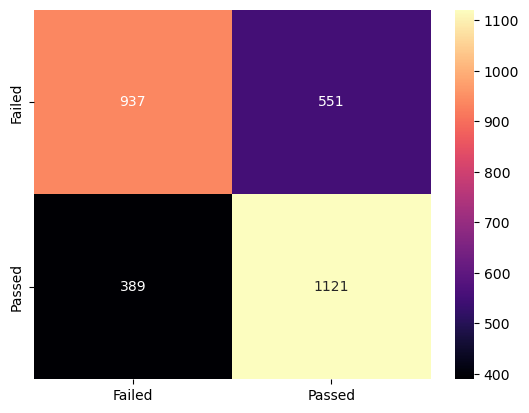

In [108]:
# Evaluar modelo final en conjunto de prueba
test_predictions = evaluate_model(X_test_sobre, weights)

# Evaluar performance del modelo
performance(y_test_sobre, test_predictions)